
---


#  🟢 Plota Série Temporal de Focos de Calor por Ano para o Brasil e o Estado de SP

---
**DADOS**:

 - Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/



---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 04/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---

# **1° Passo:** Preparando ambiente

In [1]:
# instalações
!pip install -q ultraplot cartopy salem rasterio

# Bibliotecas para manipulação de arquivos e sistema
import glob                                 # Lista arquivos em diretórios usando padrões (ex: *.nc)
import time                                 # Medição de tempo de execução e operações relacionadas a tempo

# Bibliotecas para computação numérica e dados
import numpy as np                          # Operações matemáticas eficientes com arrays multidimensionais
import pandas as pd                         # Manipulação e análise de dados em estruturas tabulares (DataFrames)
import xarray as xr                         # Trabalho com arrays multidimensionais rotulados (comum em dados científicos)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt             # Criação de gráficos e visualizações 2D/3D (biblioteca base)
import ultraplot as uplt                    # Visualização especializada para dados meteorológicos

# Bibliotecas para georreferenciamento e mapeamento
import cartopy                              # Ferramentas para criação de mapas e projeções cartográficas
import cartopy.crs as ccrs                  # Sistemas de referência de coordenadas para projeções de mapas
import cartopy.io.shapereader as shpreader  # Leitura de arquivos shapefile para mapas
import salem                                # Integração de dados geoespaciais com xarray

# Controle de avisos
import warnings                             # Gerenciamento de mensagens de alerta durante a execução
warnings.filterwarnings("ignore")           # Supressão de avisos para manter a saída limpa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **2° Passo:** Lendo os Dados do INPE

In [2]:
%%time
# define dataframe final
df = pd.DataFrame()

# FTP dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# ano inicial e final: neste caso de 2003 a 2024
anoi, anof = '2003', '2025'

# loop dos meses
for ano in range(int(anoi), int(anof)):
    print(ano)

    # nome do arquivo
    filename = f'focos_br_ref_{str(ano)}.zip'

    # leitura da tabela: 2023
    df0 = pd.read_csv(f'{url}focos_br_ref_{str(ano)}.zip', compression='zip')

    # junta a tabela que foi lida com a anterior
    df = pd.concat([df0, df], ignore_index=True)

# transforma a coluna "data_pas" para o formato "datetime"
df['data_pas'] = pd.to_datetime(df['data_pas'])

# seta a coluna "data_pas" como o índice da tabela
df.set_index('data_pas', inplace=True)

# ordena a tabela pelo índice
df.sort_index(inplace=True)

# mostra os dados
df

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
CPU times: user 22.7 s, sys: 3.94 s, total: 26.7 s
Wall time: 1min 5s


,id_bdq,foco_id,lat,lon,pais,estado,municipio,bioma
data_pas,,,,,,,,
2003-01-01 16:04:00,8093720,546621ea-5abb-11e8-911c-28924ad12c5c,-15.62100,-41.66500,Brasil,MINAS GERAIS,BERIZAL,Mata Atlântica
2003-01-01 16:04:00,8093721,546621eb-5abb-11e8-911c-28924ad12c5c,-15.27600,-41.51400,Brasil,BAHIA,TREMEDAL,Mata Atlântica
2003-01-01 16:04:00,8093724,546621ec-5abb-11e8-911c-28924ad12c5c,-14.82900,-40.13300,Brasil,BAHIA,NOVA CANAÃ,Mata Atlântica
2003-01-01 16:05:00,8093750,546621f8-5abb-11e8-911c-28924ad12c5c,-11.00900,-40.48500,Brasil,BAHIA,MIRANGABA,Caatinga
2003-01-01 16:05:00,8093755,546621fd-5abb-11e8-911c-28924ad12c5c,-11.51900,-37.54600,Brasil,SERGIPE,INDIAROBA,Mata Atlântica
...,...,...,...,...,...,...,...,...
2024-12-31 17:53:00,1739558058,e9f7a636-8f3b-3683-9186-db0b958f136f,-1.20924,-52.02020,Brasil,PARÁ,ALMEIRIM,Amazônia
2024-12-31 17:53:00,1739558043,af2a74f7-3abf-3e08-a339-296b6eabbe11,-1.81534,-53.97981,Brasil,PARÁ,MONTE ALEGRE,Amazônia
2024-12-31 17:53:00,1739557810,c3e41455-95ef-3336-9034-3c38696b2b70,-1.21053,-52.02901,Brasil,PARÁ,ALMEIRIM,Amazônia


# **3° Passo:** Agrupa os Focos de Calor por Ano

In [3]:
# Calculando a anual total - BR
anual_br = df.groupby(pd.Grouper(freq='1Y')).count()['lat']

# Calculando a anual total - SP
# seleciona os focos para um determinado Estado
df_total_sp = df[ df['estado'] == 'SÃO PAULO' ]

# calculando a anual total
anual_sp = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

In [4]:
# mostra os dados agrupados por ano para o Brasil
anual_br

,lat
data_pas,
2003-12-31,341237
2004-12-31,380445
2005-12-31,362563
2006-12-31,249179
2007-12-31,393915
2008-12-31,211933
2009-12-31,155102
2010-12-31,319383
2011-12-31,158099


In [5]:
# mostra os dados agrupados por ano para o Estado de São Paulo
anual_sp

,lat
data_pas,
2003-12-31,5597
2004-12-31,4333
2005-12-31,3832
2006-12-31,5367
2007-12-31,4476
2008-12-31,2796
2009-12-31,1763
2010-12-31,7291
2011-12-31,4183


# **4° Passo:** Plota Figura

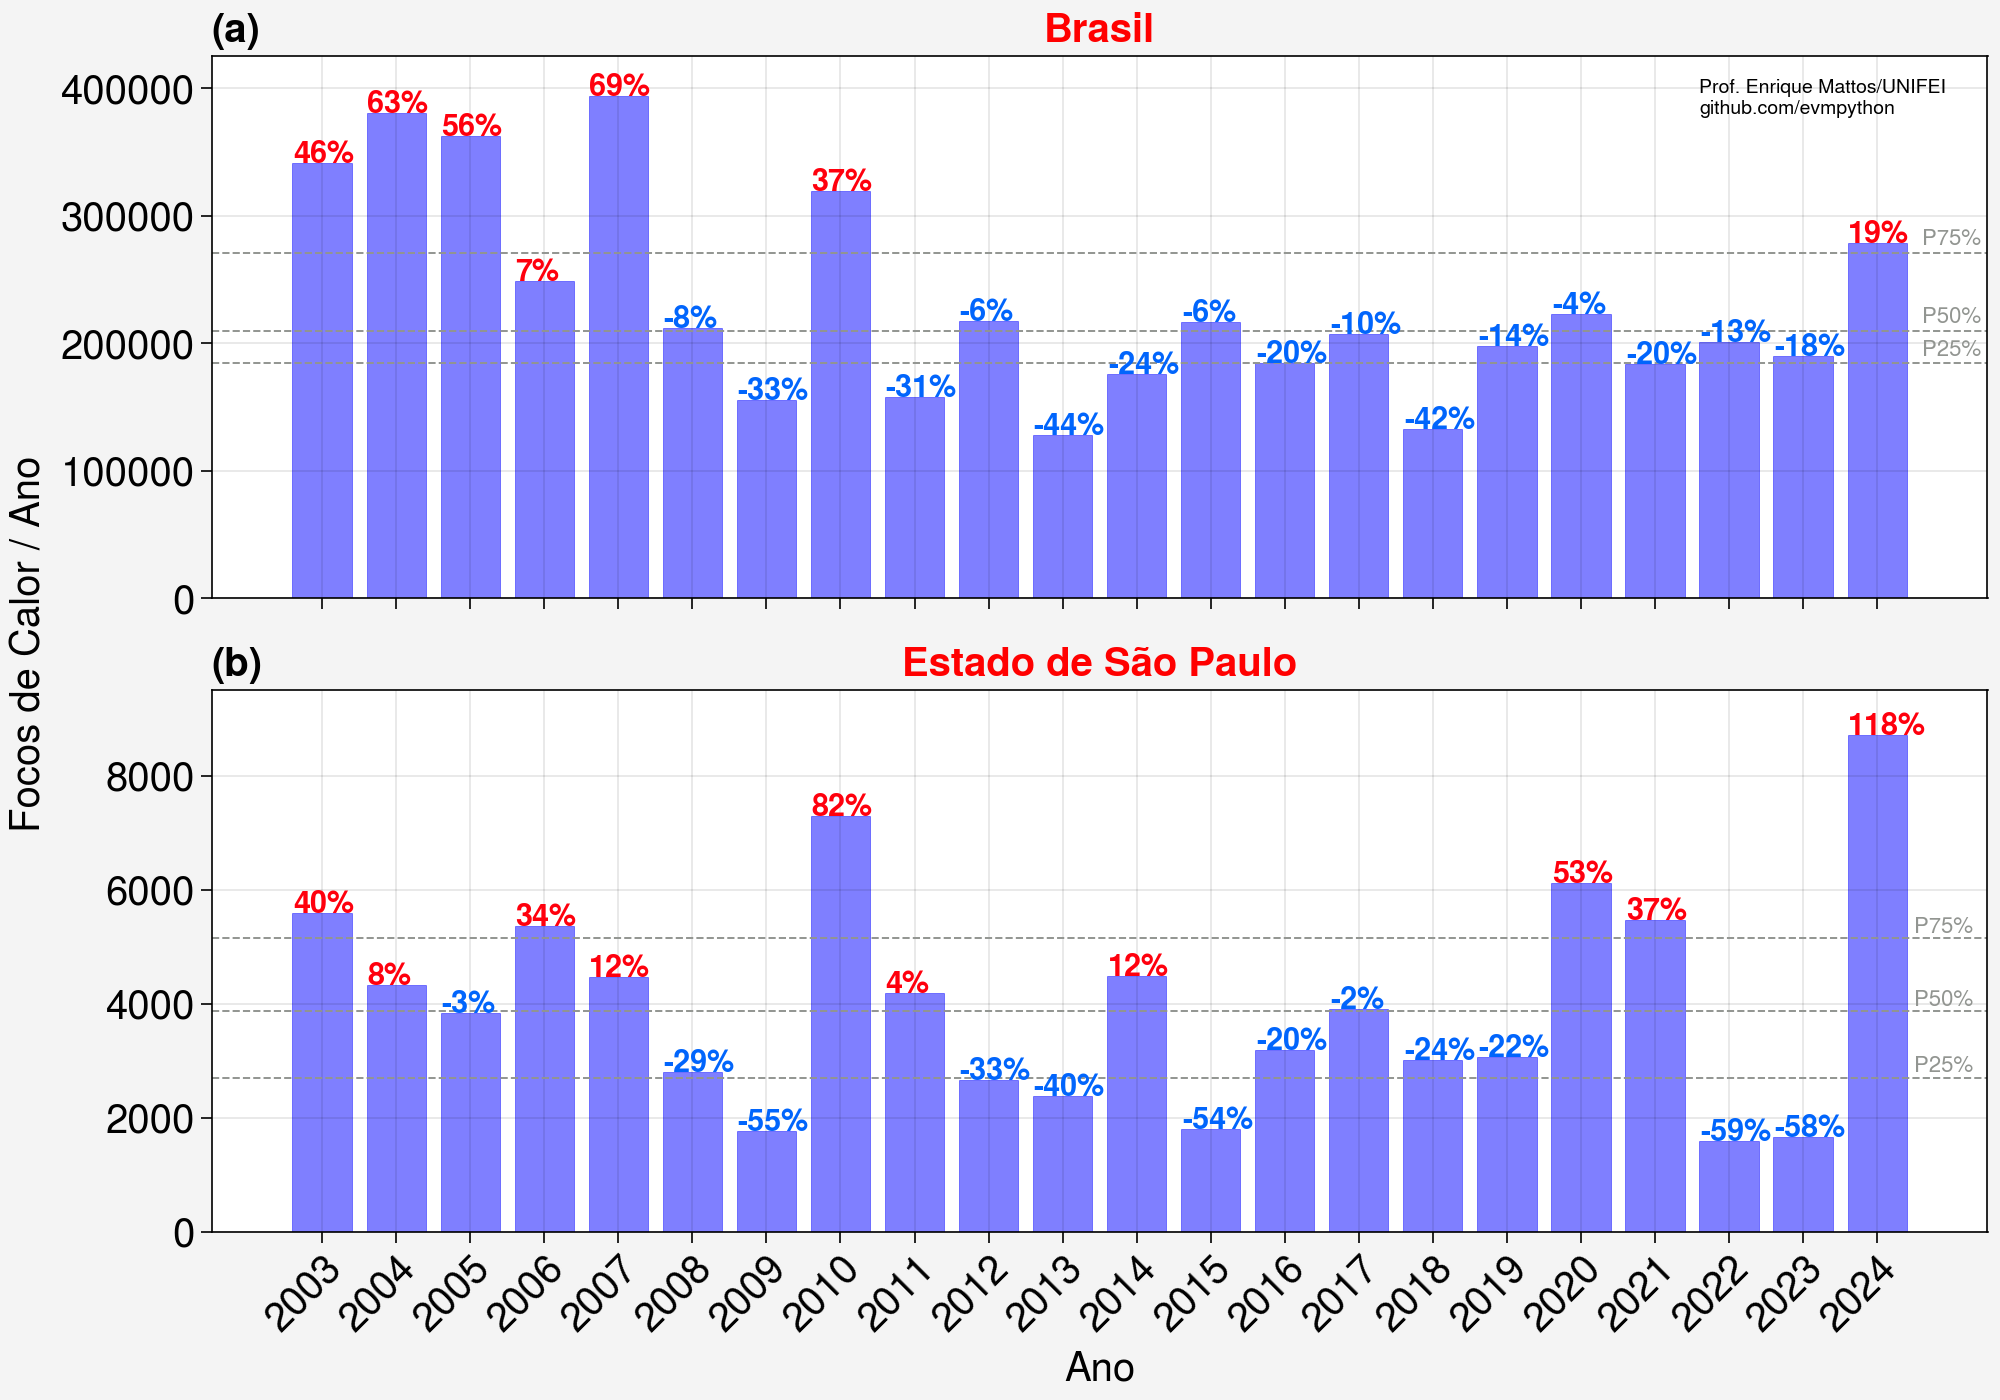

In [7]:
#===================================================================================#
#                            PLOTA GRÁFICO
#===================================================================================#
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,7), tight=True, ncols=1, nrows=2, abc=True, abcstyle='(a)', abcsize=5)

#-------------------------------#
#           BRASIL
#-------------------------------#
# gráfico
ax[0].bar(anual_br.index.year,
          anual_br.values,
          color='blue',
          alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias_br = ((anual_br.values - np.mean(anual_br.values)) / np.mean(anual_br.values)) * 100.

for ano_br, focos_br, anomalia_br in zip(anual_br.index.year, anual_br.values, anomalias_br):
    val_br = f'{str(int(anomalia_br))}%'
    if anomalia_br > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[0].text(ano_br-0.39, focos_br, val_br, color=cor, fontsize=11, weight='bold')

# formatação do eixo
ax[0].format(title='Brasil',
             titleloc='c',
             titleweight='bold',
             titlecolor='red',
             xlabel='Ano',
             ylabel='Focos de Calor / Ano',
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=uplt.arange(2003,2024,1),
             xrotation=45, ylim=(0,425000))

# plota percentil de 25%, 50%, 75%
p25 = np.percentile(anual_br.values, 25)
p50 = np.percentile(anual_br.values, 50)
p75 = np.percentile(anual_br.values, 75)
ax[0].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[0].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[0].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[0].text(2024.6, p25+6000, 'P25%', color='gray', fontsize=8)
ax[0].text(2024.6, p50+6000, 'P50%', color='gray', fontsize=8)
ax[0].text(2024.6, p75+6000, 'P75%', color='gray', fontsize=8)

# informação na figura
ax[0].annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(2021.6, 380000), fontsize=7, color='black')

#-------------------------------#
#         SÃO PAULO
#-------------------------------#
# gráfico
ax[1].bar(anual_sp.index.year,
          anual_sp.values,
          color='blue',
          alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias_sp = ((anual_sp.values - np.mean(anual_sp.values)) / np.mean(anual_sp.values)) * 100.
for ano_sp, focos_sp, anomalia_sp in zip(anual_sp.index.year, anual_sp.values, anomalias_sp):
    val_sp = f'{str(int(anomalia_sp))}%'
    if anomalia_sp > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[1].text(ano_sp-0.39, focos_sp, val_sp, color=cor, fontsize=11, weight='bold')

# formatação do eixo
ax[1].format(title='Estado de São Paulo',
             titleloc='c',
             titleweight='bold',
             titlecolor='red',
             xlabel='Ano',
             ylabel=' Focos de Calor / Ano',
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=uplt.arange(2003,2024,1),
             xrotation=45, ylim=(0,9500))

# plota percentil de 25%, 50%, 75%
p25 = np.percentile(anual_sp.values, 25)
p50 = np.percentile(anual_sp.values, 50)
p75 = np.percentile(anual_sp.values, 75)
ax[1].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[1].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[1].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[1].text(2024.5, p25+100, 'P25%', color='gray', fontsize=8)
ax[1].text(2024.5, p50+100, 'P50%', color='gray', fontsize=8)
ax[1].text(2024.5, p75+100, 'P75%', color='gray', fontsize=8)
#-------------------------------#

# salva figura
fig.save('06_serie_temporal_anual_brasil_e_SP.jpg', dpi=300)

# exibe figura na tela
uplt.show()